In [1]:
pip install vadersentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import csv
import re
from textblob import TextBlob

In [3]:
news=[]
date=[]

for j in range(1,105):
  webpage=requests.get(' https://markets.businessinsider.com/news/intc-stock?p={}&'.format(j)).text
  soup=BeautifulSoup(webpage,'lxml')
  newz2=soup.find_all('div',class_='latest-news__story')

  for i in newz2:
    news.append(i.find('a',class_='news-link').text.strip())
    date.append(i.find('time',class_='latest-news__date')['datetime'])



# final=pd.DataFrame()
df=pd.DataFrame({'Datetime':date,
        'News':news,
    })

df

,Datetime,News
0,6/19/2024 8:04:27 PM,Rag to Riches: 3 Autonomous Driving Stocks Tha...
1,6/19/2024 5:30:18 PM,3 AI Stock Underdogs Flying Below the Radar fo...
2,6/19/2024 12:00:00 PM,3 Energy Stocks to Buy Now: June 2024
3,6/19/2024 10:45:00 AM,3 Reasons to Dump Intel Stock Before It’s Too ...
4,6/18/2024 1:38:00 PM,3 Silent Stocks Quietly Amassing Fortunes for ...
...,...,...
5195,1/7/2014 5:50:56 AM,Intel shows off wearable gadgets as chipmaker ...
5196,11/26/2013 1:03:30 AM,Intel wants $500 million for Internet TV servi...
5197,11/21/2013 1:20:17 AM,"INSIGHT - For Intel, Hollywood dreams prove a ..."
5198,10/15/2013 10:22:33 PM,Wall Street ends down with debt deal elusive; ...


In [4]:
#Extracting historical data from yahoo finance
df1=pd.read_csv('INTC.csv')
df1_reversed = df1.iloc[::-1].reset_index(drop=True)
df1_reversed

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-06-14,30.290001,30.559999,30.209999,30.450001,30.450001,27301800
1,2024-06-13,30.379999,30.580000,30.139999,30.459999,30.459999,33787200
2,2024-06-12,31.459999,31.480000,30.389999,30.760000,30.760000,51323900
3,2024-06-11,30.770000,31.030001,30.530001,30.920000,30.920000,25326900
4,2024-06-10,30.549999,30.950001,30.290001,30.910000,30.910000,37445800
...,...,...,...,...,...,...,...
2795,2013-05-08,24.040001,24.290001,23.959999,24.250000,17.877756,24900600
2796,2013-05-07,23.969999,24.250000,23.940001,24.150000,17.804028,38605600
2797,2013-05-06,24.170000,24.209999,23.850000,23.910000,17.627098,31009100
2798,2013-05-03,24.219999,24.219999,23.950001,23.959999,17.663958,30085800


In [5]:
#Merging the dataframe df with all the news of the same date

df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Date'] = df['Datetime'].dt.date
df_grouped = df.groupby('Date')['News'].apply(' '.join).reset_index()
df1_grouped = df_grouped.iloc[::-1].reset_index(drop=True)
df1_grouped

<ipython-input-5-6ffefb5438a4>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Datetime'])


,Date,News
0,2024-06-19,Rag to Riches: 3 Autonomous Driving Stocks Tha...
1,2024-06-18,3 Silent Stocks Quietly Amassing Fortunes for ...
2,2024-06-17,3 Cheap Tech Stocks That Could Be the Next Big...
3,2024-06-15,Why Intel Stock Is Undervalued and Well-Positi...
4,2024-06-14,AI Avengers: 3 Stocks Leading the Charge Again...
...,...,...
1652,2014-01-14,Intel not opening new chip factory heralded by...
1653,2014-01-07,Intel shows off wearable gadgets as chipmaker ...
1654,2013-11-26,Intel wants $500 million for Internet TV servi...
1655,2013-11-21,"INSIGHT - For Intel, Hollywood dreams prove a ..."


In [6]:
#CLeaning the data
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenize
    words = word_tokenize(text)

    # Convert to lower case
    words = [word.lower() for word in words]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join words back to string
    cleaned_text = ' '.join(words)

    return cleaned_text

# Apply preprocessing to the news column
df1_grouped['clean_data'] = df1_grouped['News'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
#word frequency
def count_words(text):
  words = word_tokenize(text)
  return len(words)

# Apply the count_words function to the clean_data column
df1_grouped['word_count'] = df1_grouped['clean_data'].apply(count_words)

# Print the DataFrame
df1_grouped

,Date,News,clean_data,word_count
0,2024-06-19,Rag to Riches: 3 Autonomous Driving Stocks Tha...,rag rich : 3 autonomous driving stock could ma...,32
1,2024-06-18,3 Silent Stocks Quietly Amassing Fortunes for ...,3 silent stock quietly amassing fortune investor,7
2,2024-06-17,3 Cheap Tech Stocks That Could Be the Next Big...,3 cheap tech stock could next big thing 3 blue...,45
3,2024-06-15,Why Intel Stock Is Undervalued and Well-Positi...,intel stock undervalued well-positioned thrive...,7
4,2024-06-14,AI Avengers: 3 Stocks Leading the Charge Again...,ai avenger : 3 stock leading charge market med...,25
...,...,...,...,...
1652,2014-01-14,Intel not opening new chip factory heralded by...,intel opening new chip factory heralded obama,7
1653,2014-01-07,Intel shows off wearable gadgets as chipmaker ...,intel show wearable gadget chipmaker expands b...,8
1654,2013-11-26,Intel wants $500 million for Internet TV servi...,intel want $ 500 million internet tv service :...,10
1655,2013-11-21,"INSIGHT - For Intel, Hollywood dreams prove a ...","insight - intel , hollywood dream prove leap far",9


In [8]:
pip install textstat


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.8 MB/s eta 0:00:00


In [9]:
import textstat
# Function to calculate readability score
def readability_score(text):
    return textstat.flesch_reading_ease(text)

# Apply the readability score calculation to the clean_data column
df1_grouped['readability_score'] = df1_grouped['clean_data'].apply(readability_score)

print(df1_grouped)


            Date                                               News  \
0     2024-06-19  Rag to Riches: 3 Autonomous Driving Stocks Tha...   
1     2024-06-18  3 Silent Stocks Quietly Amassing Fortunes for ...   
2     2024-06-17  3 Cheap Tech Stocks That Could Be the Next Big...   
3     2024-06-15  Why Intel Stock Is Undervalued and Well-Positi...   
4     2024-06-14  AI Avengers: 3 Stocks Leading the Charge Again...   
...          ...                                                ...   
1652  2014-01-14  Intel not opening new chip factory heralded by...   
1653  2014-01-07  Intel shows off wearable gadgets as chipmaker ...   
1654  2013-11-26  Intel wants $500 million for Internet TV servi...   
1655  2013-11-21  INSIGHT - For Intel, Hollywood dreams prove a ...   
1656  2013-10-15  Wall Street ends down with debt deal elusive; ...   

                                             clean_data  word_count  \
0     rag rich : 3 autonomous driving stock could ma...          32   
1    

In [10]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [11]:
# Load spaCy model
import spacy
nlp = spacy.load('en_core_web_sm')

# Function to calculate the ratio of named entities to total words
def named_entity_ratio(text):
    doc = nlp(text)
    num_entities = len(doc.ents)
    num_words = len(text.split())
    return num_entities / num_words if num_words > 0 else 0

# Apply the named entity ratio calculation to the clean_data column
df1_grouped['entity_ratio'] = df1_grouped['clean_data'].apply(named_entity_ratio)

df1_grouped

,Date,News,clean_data,word_count,readability_score,entity_ratio
0,2024-06-19,Rag to Riches: 3 Autonomous Driving Stocks Tha...,rag rich : 3 autonomous driving stock could ma...,32,58.96,0.187500
1,2024-06-18,3 Silent Stocks Quietly Amassing Fortunes for ...,3 silent stock quietly amassing fortune investor,7,55.91,0.142857
2,2024-06-17,3 Cheap Tech Stocks That Could Be the Next Big...,3 cheap tech stock could next big thing 3 blue...,45,47.80,0.177778
3,2024-06-15,Why Intel Stock Is Undervalued and Well-Positi...,intel stock undervalued well-positioned thrive...,7,30.53,0.142857
4,2024-06-14,AI Avengers: 3 Stocks Leading the Charge Again...,ai avenger : 3 stock leading charge market med...,25,94.66,0.080000
...,...,...,...,...,...,...
1652,2014-01-14,Intel not opening new chip factory heralded by...,intel opening new chip factory heralded obama,7,30.53,0.142857
1653,2014-01-07,Intel shows off wearable gadgets as chipmaker ...,intel show wearable gadget chipmaker expands b...,8,37.98,0.125000
1654,2013-11-26,Intel wants $500 million for Internet TV servi...,intel want $ 500 million internet tv service :...,10,63.36,0.300000
1655,2013-11-21,"INSIGHT - For Intel, Hollywood dreams prove a ...","insight - intel , hollywood dream prove leap far",9,64.37,0.000000


In [12]:
#Subjectivity
def Subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Polarity
def Polarity(text):
  return TextBlob(text).sentiment.polarity

In [13]:
#merge subjectivity and polarity
df1_grouped['Subjectivity'] = df1_grouped['clean_data'].apply(Subjectivity)
df1_grouped['Polarity'] = df1_grouped['clean_data'].apply(Polarity)
df1_grouped


,Date,News,clean_data,word_count,readability_score,entity_ratio,Subjectivity,Polarity
0,2024-06-19,Rag to Riches: 3 Autonomous Driving Stocks Tha...,rag rich : 3 autonomous driving stock could ma...,32,58.96,0.187500,0.683333,0.241667
1,2024-06-18,3 Silent Stocks Quietly Amassing Fortunes for ...,3 silent stock quietly amassing fortune investor,7,55.91,0.142857,0.216667,0.000000
2,2024-06-17,3 Cheap Tech Stocks That Could Be the Next Big...,3 cheap tech stock could next big thing 3 blue...,45,47.80,0.177778,0.528283,0.298485
3,2024-06-15,Why Intel Stock Is Undervalued and Well-Positi...,intel stock undervalued well-positioned thrive...,7,30.53,0.142857,0.000000,0.000000
4,2024-06-14,AI Avengers: 3 Stocks Leading the Charge Again...,ai avenger : 3 stock leading charge market med...,25,94.66,0.080000,0.483333,0.100000
...,...,...,...,...,...,...,...,...
1652,2014-01-14,Intel not opening new chip factory heralded by...,intel opening new chip factory heralded obama,7,30.53,0.142857,0.454545,0.136364
1653,2014-01-07,Intel shows off wearable gadgets as chipmaker ...,intel show wearable gadget chipmaker expands b...,8,37.98,0.125000,0.000000,0.000000
1654,2013-11-26,Intel wants $500 million for Internet TV servi...,intel want $ 500 million internet tv service :...,10,63.36,0.300000,0.000000,0.000000
1655,2013-11-21,"INSIGHT - For Intel, Hollywood dreams prove a ...","insight - intel , hollywood dream prove leap far",9,64.37,0.000000,1.000000,0.100000


In [14]:
#merging data
df1_reversed['Date']=pd.to_datetime(df1_reversed['Date'])
df1_grouped['Date']=pd.to_datetime(df1_grouped['Date'])
merged_df = df1_reversed.merge(df1_grouped, how='inner', on=['Date'])

In [15]:
#Importing SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#sentiment scores function
def getSIA(text):
  s = SentimentIntensityAnalyzer()
  senti=s.polarity_scores(text)
  return senti

In [16]:
#getting the scores
comp=[]
nega=[]
posi=[]
neut =[]
SIA =0

for i in range(0,len(merged_df['clean_data'])):
  SIA = getSIA(merged_df['clean_data'][i])
  comp.append(SIA['compound'])
  nega.append(SIA['neg'])
  posi.append(SIA['pos'])
  neut.append(SIA['neu'])

In [17]:
#Creating new colums for sentiment scores for analysis
merged_df['Compound']=comp
merged_df['Negative']=nega
merged_df['Positive']=posi
merged_df['Neutral']=neut

merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,News,clean_data,word_count,readability_score,entity_ratio,Subjectivity,Polarity,Compound,Negative,Positive,Neutral
0,2024-06-14,30.290001,30.559999,30.209999,30.450001,30.450001,27301800,AI Avengers: 3 Stocks Leading the Charge Again...,ai avenger : 3 stock leading charge market med...,25,94.66,0.080000,0.483333,0.100000,-0.0772,0.051,0.000,0.949
1,2024-06-13,30.379999,30.580000,30.139999,30.459999,30.459999,33787200,3 Stocks at 52-Week Lows Poised for a Powerful...,3 stock 52-week low poised powerful rebound : ...,42,76.93,0.166667,0.466667,0.108333,0.4199,0.089,0.147,0.765
2,2024-06-12,31.459999,31.480000,30.389999,30.760000,30.760000,51323900,TSM Forecast: Don’t Let the Vertical Price Mov...,tsm forecast : ’ let vertical price move taiwa...,31,58.96,0.129032,0.450000,0.300000,0.0516,0.090,0.096,0.815
3,2024-06-11,30.770000,31.030001,30.530001,30.920000,30.920000,25326900,Biden Mulls New Restrictions On China's Advanc...,biden mull new restriction china 's advanced a...,50,65.56,0.080000,0.527273,0.268182,0.1280,0.069,0.078,0.853
4,2024-06-10,30.549999,30.950001,30.290001,30.910000,30.910000,37445800,The 7 Best Stocks to Buy to Avoid June Gloom T...,7 best stock buy avoid june gloom 3 best stock...,47,35.28,0.170213,0.437576,0.500606,0.7096,0.099,0.183,0.718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,2014-01-14,26.010000,26.549999,25.900000,26.510000,19.919863,74142900,Intel not opening new chip factory heralded by...,intel opening new chip factory heralded obama,7,30.53,0.142857,0.454545,0.136364,0.0000,0.000,0.000,1.000
1467,2014-01-07,25.540001,25.730000,25.469999,25.590000,19.228561,19665100,Intel shows off wearable gadgets as chipmaker ...,intel show wearable gadget chipmaker expands b...,8,37.98,0.125000,0.000000,0.000000,0.1027,0.000,0.167,0.833
1468,2013-11-26,23.790001,23.840000,23.520000,23.650000,17.770834,30600800,Intel wants $500 million for Internet TV servi...,intel want $ 500 million internet tv service :...,10,63.36,0.300000,0.000000,0.000000,0.0772,0.000,0.126,0.874
1469,2013-11-21,24.610001,25.290001,24.520000,25.230000,18.958059,44050600,"INSIGHT - For Intel, Hollywood dreams prove a ...","insight - intel , hollywood dream prove leap far",9,64.37,0.000000,1.000000,0.100000,0.2500,0.000,0.200,0.800


In [18]:
#Adding a label
merged_df['label'] = np.where(merged_df['Open'] > merged_df['Close'], 0, 1)
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,News,clean_data,word_count,readability_score,entity_ratio,Subjectivity,Polarity,Compound,Negative,Positive,Neutral,label
0,2024-06-14,30.290001,30.559999,30.209999,30.450001,30.450001,27301800,AI Avengers: 3 Stocks Leading the Charge Again...,ai avenger : 3 stock leading charge market med...,25,94.66,0.080000,0.483333,0.100000,-0.0772,0.051,0.000,0.949,1
1,2024-06-13,30.379999,30.580000,30.139999,30.459999,30.459999,33787200,3 Stocks at 52-Week Lows Poised for a Powerful...,3 stock 52-week low poised powerful rebound : ...,42,76.93,0.166667,0.466667,0.108333,0.4199,0.089,0.147,0.765,1
2,2024-06-12,31.459999,31.480000,30.389999,30.760000,30.760000,51323900,TSM Forecast: Don’t Let the Vertical Price Mov...,tsm forecast : ’ let vertical price move taiwa...,31,58.96,0.129032,0.450000,0.300000,0.0516,0.090,0.096,0.815,0
3,2024-06-11,30.770000,31.030001,30.530001,30.920000,30.920000,25326900,Biden Mulls New Restrictions On China's Advanc...,biden mull new restriction china 's advanced a...,50,65.56,0.080000,0.527273,0.268182,0.1280,0.069,0.078,0.853,1
4,2024-06-10,30.549999,30.950001,30.290001,30.910000,30.910000,37445800,The 7 Best Stocks to Buy to Avoid June Gloom T...,7 best stock buy avoid june gloom 3 best stock...,47,35.28,0.170213,0.437576,0.500606,0.7096,0.099,0.183,0.718,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,2014-01-14,26.010000,26.549999,25.900000,26.510000,19.919863,74142900,Intel not opening new chip factory heralded by...,intel opening new chip factory heralded obama,7,30.53,0.142857,0.454545,0.136364,0.0000,0.000,0.000,1.000,1
1467,2014-01-07,25.540001,25.730000,25.469999,25.590000,19.228561,19665100,Intel shows off wearable gadgets as chipmaker ...,intel show wearable gadget chipmaker expands b...,8,37.98,0.125000,0.000000,0.000000,0.1027,0.000,0.167,0.833,1
1468,2013-11-26,23.790001,23.840000,23.520000,23.650000,17.770834,30600800,Intel wants $500 million for Internet TV servi...,intel want $ 500 million internet tv service :...,10,63.36,0.300000,0.000000,0.000000,0.0772,0.000,0.126,0.874,0
1469,2013-11-21,24.610001,25.290001,24.520000,25.230000,18.958059,44050600,"INSIGHT - For Intel, Hollywood dreams prove a ...","insight - intel , hollywood dream prove leap far",9,64.37,0.000000,1.000000,0.100000,0.2500,0.000,0.200,0.800,1


In [19]:
#Model training
final_col=['Open','Volume','Subjectivity','Polarity','entity_ratio','word_count','readability_score','Compound','Negative','Positive','Neutral','label']
mod_train=merged_df[final_col]
mod_train

,Open,Volume,Subjectivity,Polarity,entity_ratio,word_count,readability_score,Compound,Negative,Positive,Neutral,label
0,30.290001,27301800,0.483333,0.100000,0.080000,25,94.66,-0.0772,0.051,0.000,0.949,1
1,30.379999,33787200,0.466667,0.108333,0.166667,42,76.93,0.4199,0.089,0.147,0.765,1
2,31.459999,51323900,0.450000,0.300000,0.129032,31,58.96,0.0516,0.090,0.096,0.815,0
3,30.770000,25326900,0.527273,0.268182,0.080000,50,65.56,0.1280,0.069,0.078,0.853,1
4,30.549999,37445800,0.437576,0.500606,0.170213,47,35.28,0.7096,0.099,0.183,0.718,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1466,26.010000,74142900,0.454545,0.136364,0.142857,7,30.53,0.0000,0.000,0.000,1.000,1
1467,25.540001,19665100,0.000000,0.000000,0.125000,8,37.98,0.1027,0.000,0.167,0.833,1
1468,23.790001,30600800,0.000000,0.000000,0.300000,10,63.36,0.0772,0.000,0.126,0.874,0
1469,24.610001,44050600,1.000000,0.100000,0.000000,9,64.37,0.2500,0.000,0.200,0.800,1


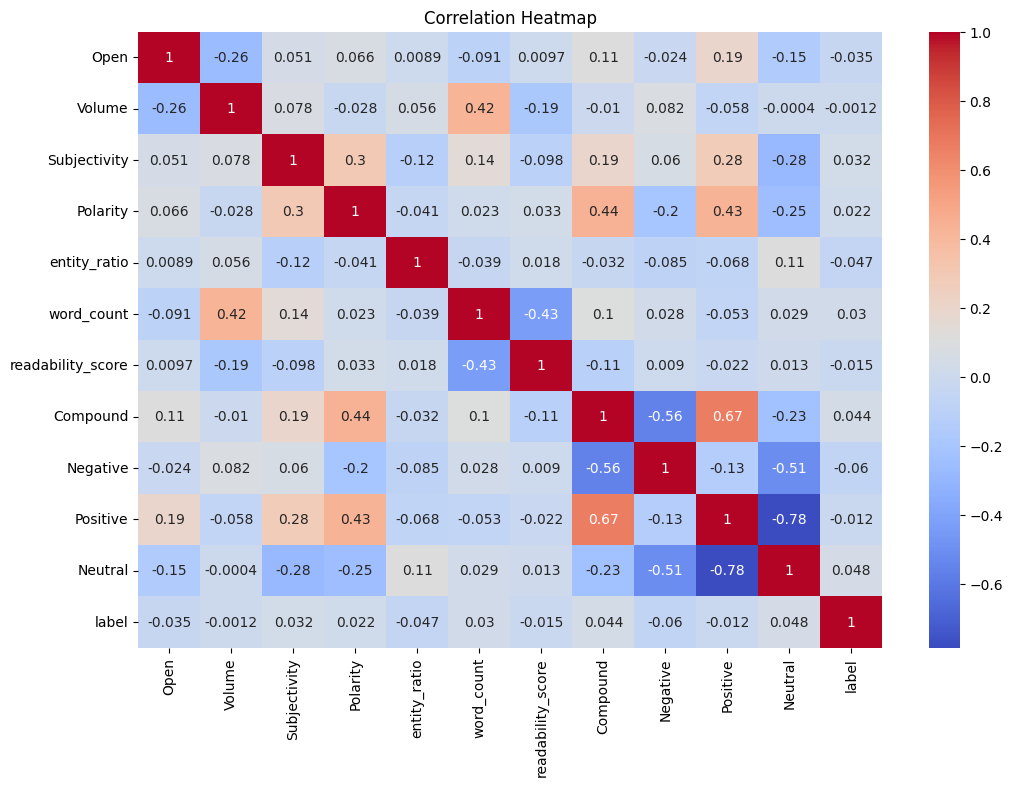

In [20]:
#Correlation heatmap of the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
correlation_matrix = mod_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

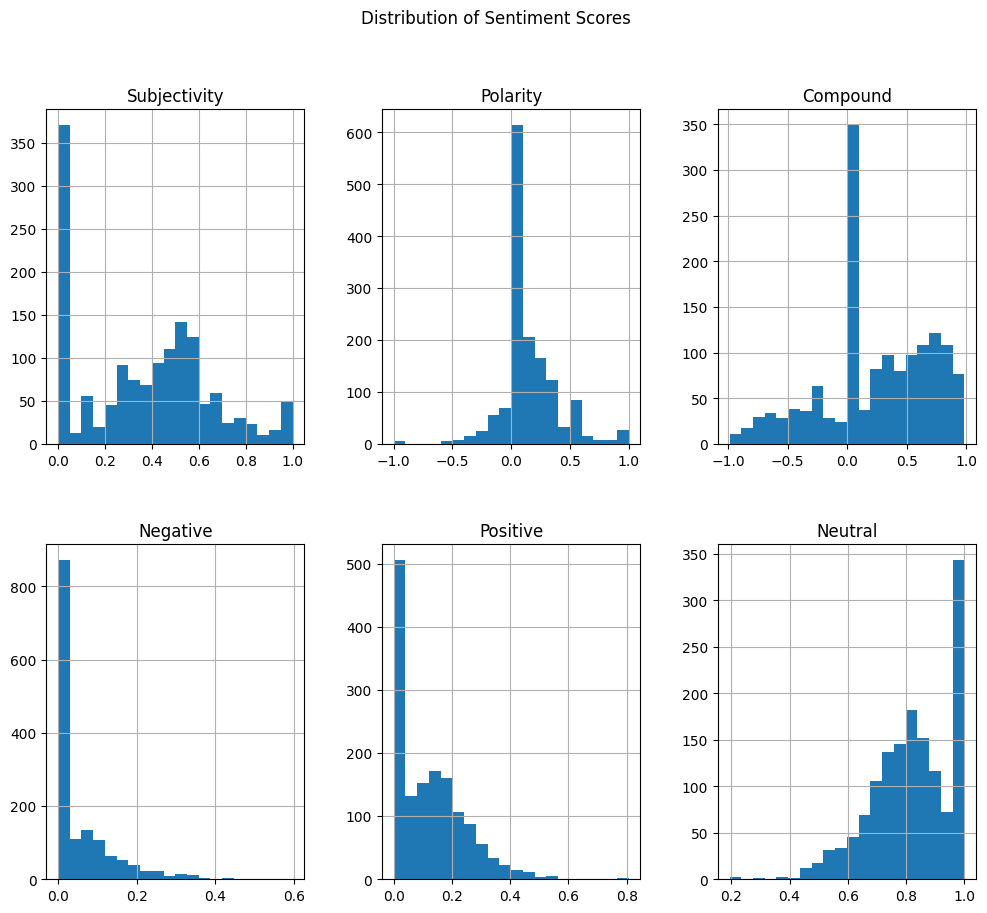

In [21]:
#Histogram
sentiment_columns = ['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Positive', 'Neutral']
mod_train[sentiment_columns].hist(bins=20, figsize=(12, 10), layout=(2, 3))
plt.suptitle('Distribution of Sentiment Scores')
plt.show()

In [22]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming `X` and `y` are your features and target variable
mod_train8 = mod_train.copy()
X8 = mod_train8.drop('label',axis=1)
y8 = mod_train8['label']
# Split the data
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X8_train_scaled = scaler.fit_transform(X8_train)
X8_test_scaled = scaler.transform(X8_test)

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Define the parameter grid for GridSearchCV
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': ['auto', None],
    'n_components': [None, 2, 3, 4]  # Adjust as needed based on your data dimensionality
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit GridSearchCV to the training data
grid_search.fit(X8_train_scaled, y8_train)
# Best estimator from the grid search
best_lda = grid_search.best_estimator_
# Make predictions with the best LDA model
predictions_lda = best_lda.predict(X8_test_scaled)
# Evaluate the best LDA model
accuracy = accuracy_score(y8_test, predictions_lda)
report = classification_report(y8_test, predictions_lda)
print("Best LDA Model Parameters:")
print(best_lda)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)


Best LDA Model Parameters:
LinearDiscriminantAnalysis()

Accuracy: 0.5423728813559322

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.36      0.44       143
           1       0.54      0.71      0.62       152

    accuracy                           0.54       295
   macro avg       0.54      0.54      0.53       295
weighted avg       0.54      0.54      0.53       295



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
95 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

---------------------------------------------------------------------------

In [23]:
#SVM model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming `X` and `y` are your features and target variable
mod_train7 = mod_train.copy()
X7 = mod_train7.drop('label',axis=1)
y7 = mod_train7['label']
# Split the data
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X7_train_scaled = scaler.fit_transform(X7_train)
X7_test_scaled = scaler.transform(X7_test)

# Initialize the SVM model
svm = SVC()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit GridSearchCV to the training data
grid_search.fit(X7_train_scaled, y7_train)
# Best estimator from the grid search
best_svm = grid_search.best_estimator_
# Make predictions with the best SVM model
predictions_svm = best_svm.predict(X7_test_scaled)
# Evaluate the best SVM model
accuracy = accuracy_score(y7_test, predictions_svm)
report = classification_report(y7_test, predictions_svm)
print("Best SVM Model Parameters:")
print(best_svm)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

Best SVM Model Parameters:
SVC(C=10)

Accuracy: 0.5050847457627119

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.48       143
           1       0.52      0.53      0.53       152

    accuracy                           0.51       295
   macro avg       0.50      0.50      0.50       295
weighted avg       0.50      0.51      0.50       295



Sharpe Ratio: 0.2921579061373098
Maximum Drawdown: 1.0350877192982457
Number of Trades Executed: 293
Win Ratio: 0.5187713310580204


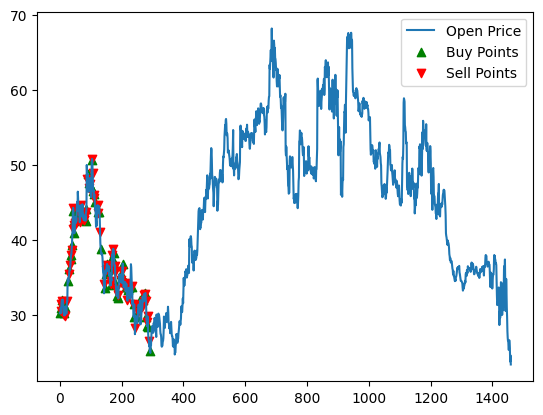

Final Portfolio: 9989.790002999998
Final Returns: 0.9989790002999999


In [25]:
#momentum strategy
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

# Load the data
data9 = merged_df.copy()

# Calculate momentum
momentum_window = 10  # Look-back period for momentum calculation
data9['Momentum'] = data9['Open'].pct_change(momentum_window)

# Drop NaN values
data9.dropna(inplace=True)

# Create the features and target variables
features = ['Open', 'Volume', 'Subjectivity', 'Polarity', 'entity_ratio', 'readability_score', 'Compound', 'Negative', 'Positive', 'Neutral', 'Momentum']
X20 = data9[features]
y20 = data9['label']
# Standardize the features
scaler = StandardScaler()
X20_scaled = scaler.fit_transform(X20)
# Split the data into training and test sets
X20_train, X20_test, y20_train, y20_test = train_test_split(X20_scaled, y20, test_size=0.2, random_state=0)

# Optimize the Gradient Boosting model with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gbc = GradientBoostingClassifier()
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X20_train, y20_train)
# Train the optimized Gradient Boosting model
best_gbc = grid_search.best_estimator_
best_gbc.fit(X20_train, y20_train)
# Make predictions on the test set
predictions = best_gbc.predict(X20_test)
accuracy = accuracy_score(y20_test, predictions)
report = classification_report(y20_test, predictions)

# Calculate the performance metrics
sharpe_ratio = (np.mean(predictions) - np.mean(y20_test)) / np.std(predictions - y20_test)
cumulative_returns = np.cumsum(predictions - y20_test)
max_drawdown = (np.max(cumulative_returns) - np.min(cumulative_returns)) / np.max(cumulative_returns)
num_trades = len(predictions)
win_ratio = np.mean(predictions == y20_test)
# Print the performance metrics
print("Sharpe Ratio:", sharpe_ratio)
print("Maximum Drawdown:", max_drawdown)
print("Number of Trades Executed:", num_trades)
print("Win Ratio:", win_ratio)
# Devise a trading strategy
buy_points = []
sell_points = []
for i in range(1, len(predictions)):
    if predictions[i] == 1 and predictions[i-1] == 0:
        buy_points.append(i)
    elif predictions[i] == 0 and predictions[i-1] == 1:
        sell_points.append(i)
# Plot the buy and sell points
plt.plot(data9['Open'].values, label='Open Price')
plt.scatter(buy_points, data9['Open'].values[buy_points], color='green', marker='^', label='Buy Points')
plt.scatter(sell_points, data9['Open'].values[sell_points], color='red', marker='v', label='Sell Points')
plt.legend()
plt.show()
# Calculate the final portfolio and returns
initial_portfolio = 10000
final_portfolio = initial_portfolio
for i in range(min(len(buy_points), len(sell_points))):
    final_portfolio += data9['Open'].values[sell_points[i]] - data9['Open'].values[buy_points[i]]
final_returns = final_portfolio / initial_portfolio
print("Final Portfolio:", final_portfolio)
print("Final Returns:", final_returns)